In [1]:
import os
import pyedflib
import scipy.io
import numpy as np
import h5py
import mne
from matplotlib import pyplot as plt
from config.config import DataConfig

In [2]:
# Load EEG metadata from EDF file
# !! somehow we are getting 93 channels here even though it should be 83
def load_edf_metadata(edf_path):
    with pyedflib.EdfReader(edf_path) as f:
        n_channels = f.signals_in_file
        signal_labels = f.getSignalLabels()
        sample_rates = [f.getSampleFrequency(i) for i in range(n_channels)]
        duration = f.file_duration

        unique_channels = set(signal_labels)
        # duplicates = [channel for channel in unique_channels if signal_labels.count(channel) > 1]

        # # Output results
        # if duplicates:
        #     print("Duplicate channels found:", duplicates)
        # else:
        #     print("No duplicates found.")
        #     print(f"Metadata for {edf_path}:")
        
        print(f"- Number of Channels: {n_channels}")
        print(f"- Signal Labels: {signal_labels}")
        print("Number of signal labels:", len(signal_labels))
        print(f"- Sampling Rates: {sample_rates}")
        print(f"- Recording Duration: {duration} sec")
        

# Load Artifact Matrices using h5py for v7.3 MATLAB files
def load_artifact_matrices(artifact_folder):
    artifact_files = [f for f in os.listdir(artifact_folder) if f.endswith(".mat")]
    artifact_data = {}

    for file in artifact_files:
        file_path = os.path.join(artifact_folder, file)
        
        try:
            with h5py.File(file_path, 'r') as mat_data:
                print(f"\nLoaded artifact matrix: {file}")
                print("Keys in this file:", list(mat_data.keys()))
                
                # Load all datasets into dictionary
                artifact_data[file] = {key: np.array(mat_data[key]) for key in mat_data.keys()}

        except Exception as e:
            print(f"Error loading {file}: {e}")
    
    return artifact_data

In [3]:
# subjects EPCTL01 to EPCTL29
for subject_id in DataConfig.SUBJECTS:
    paths = DataConfig.get_subject_paths(subject_id)
    print(f"\nProcessing subject: {subject_id}")
    load_edf_metadata(paths['edf'])


Processing subject: EPCTL01
- Number of Channels: 93
- Signal Labels: ['Fp1-Ref', 'Fp2-Ref', 'F3-Ref', 'F4-Ref', 'C3-Ref', 'C4-Ref', 'P3-Ref', 'P4-Ref', 'O1-Ref', 'O2-Ref', 'F7-Ref', 'F8-Ref', 'T3-Ref', 'T4-Ref', 'T5-Ref', 'T6-Ref', 'FZ-Ref', 'CZ-Ref', 'PZ-Ref', 'SO1-Ref', 'SO2-Ref', 'F9-Ref', 'F10-Ref', 'ZY1', 'ZY2', 'T9-Ref', 'T10-Ref', 'P9-Ref', 'P10-Ref', 'AF7-Ref', 'AF3-Ref', 'F11', 'F5-Ref', 'F1-Ref', 'FT11', 'FT9-Ref', 'FT7-Ref', 'FC5-Ref', 'FC3-Ref', 'FC1-Ref', 'FCZ-Ref', 'C5-Ref', 'C1-Ref', 'TP11', 'TP9-Ref', 'TP7-Ref', 'CP3-Ref', 'CP1-Ref', 'P11', 'P5-Ref', 'P1-Ref', 'PO7-Ref', 'PO3-Ref', 'POZ-Ref', 'OZ-Ref', 'FPZ-Ref', 'AFZ-Ref', 'AF4-Ref', 'AF8-Ref', 'F2-Ref', 'F6-Ref', 'F12', 'FC2-Ref', 'FC4-Ref', 'FC6-Ref', 'FT8-Ref', 'FT10-Ref', 'FT12', 'C6-Ref', 'C2-Ref', 'CPZ-Ref', 'CP2-Ref', 'CP4-Ref', 'CP6-Ref', 'TP8-Ref', 'TP10-Ref', 'TP12', 'P2-Ref', 'P6-Ref', 'P12', 'PO4-Ref', 'PO8-Ref', 'ChEMG1', 'ChEMG2', 'RLEG-', 'RLEG+', 'LLEG-', 'LLEG+', 'EOG2', 'EOG1', 'ECG2', 'ECG1', 'CP5'

In [4]:
artifact_data = load_artifact_matrices(DataConfig.ARTIFACT_PATH)


Loaded artifact matrix: EPCTL21_artndxn.mat
Keys in this file: ['artndxn', 'visgood', 'visnum']

Loaded artifact matrix: EPCTL13_artndxn.mat
Keys in this file: ['artndxn', 'visgood', 'visnum']

Loaded artifact matrix: EPCTL28_artndxn.mat
Keys in this file: ['artndxn', 'visgood', 'visnum']

Loaded artifact matrix: EPCTL06_artndxn.mat
Keys in this file: ['artndxn', 'visgood', 'visnum']

Loaded artifact matrix: EPCTl03_artndxn.mat
Keys in this file: ['artndxn', 'visgood', 'visnum']

Loaded artifact matrix: EPCTL24_artndxn.mat
Keys in this file: ['artndxn', 'visgood', 'visnum']

Loaded artifact matrix: EPCTL16_artndxn.mat
Keys in this file: ['artndxn', 'visgood', 'visnum']

Loaded artifact matrix: EPCTL15_artndxn.mat
Keys in this file: ['artndxn', 'visgood', 'visnum']

Loaded artifact matrix: EPCTL27_artndxn.mat
Keys in this file: ['artndxn', 'visgood', 'visnum']

Loaded artifact matrix: EPCTL09_artndxn.mat
Keys in this file: ['artndxn', 'visgood', 'visnum']

Loaded artifact matrix: EPCTL

In [5]:
artifact_path = os.path.join(DataConfig.BASE_PATH, "Artifact matrix")

In [6]:
import os
import pyedflib
import numpy as np
import pandas as pd
import h5py

# Load subject details CSV file
details_csv = os.path.join(DataConfig.BASE_PATH, "Details information for healthy subjects.csv")
details = pd.read_csv(details_csv)
print("Loaded details:\n", details.head())

def load_edf_metadata(edf_path):
    with pyedflib.EdfReader(edf_path) as f:
        n_channels = f.signals_in_file
        signal_labels = f.getSignalLabels()
        sample_rates = [f.getSampleFrequency(i) for i in range(n_channels)]
        duration = f.file_duration
        print(f"Metadata for {edf_path}:")
        print(f"  Channels: {n_channels}")
        print(f"  Labels: {signal_labels}")
        print(f"  Sampling Rates (Hz): {sample_rates}")
        print(f"  Duration (sec): {duration}")

def load_artifact_matrices(artifact_folder):
    artifact_files = [f for f in os.listdir(artifact_folder) if f.endswith(".mat")]
    artifact_data = {}
    for file in artifact_files:
        file_path = os.path.join(artifact_folder, file)
        try:
            with h5py.File(file_path, 'r') as mat_data:
                print(f"\nLoaded artifact matrix: {file}")
                print("  Keys:", list(mat_data.keys()))
                artifact_data[file] = {key: np.array(mat_data[key]) for key in mat_data.keys()}
        except Exception as e:
            print(f"Error loading {file}: {e}")
    return artifact_data

def load_txt_file(txt_path):
    # Assumes a whitespace-delimited text file.
    data = np.loadtxt(txt_path, dtype=str)
    return data

Loaded details:
   Subjects ID Sex  Age   TRT   TST (min)  SE (% TRT)  SOL (min)  REML (min)  \
0     EPCTL01   F   23  476.0      453.0          95        1.0       113.0   
1     EPCTL02   M   24  508.5      411.0          81       10.5       198.5   
2     EPCTL03   M   27  380.5      352.5          93        5.0        73.5   
3     EPCTL04   M   35  367.5      253.5          69       54.0       164.5   
4     EPCTL05   M   26  364.5      341.0          94       13.0        83.0   

   WASO(min)  N1 (min)  N2 (min)  N3(min)  R(min)  
0       22.0      37.0     235.5     92.5    88.0  
1       87.0      42.0     246.0     88.0    35.0  
2       23.0      33.0     152.5    103.5    63.5  
3       60.0      47.5     107.0     62.0    37.0  
4       10.5      35.5     154.5     85.0    66.0  


In [7]:
# Loop over subject folders (EPCTL01 to EPCTL29)
for subject_id in DataConfig.SUBJECTS:
    paths = DataConfig.get_subject_paths(subject_id)
    print(f"\nProcessing subject: {subject_id}")
    
    # Load EDF metadata
    load_edf_metadata(paths['edf'])
    
    # Get subject folder path
    subject_folder = os.path.dirname(paths['edf'])  # Get the directory containing the EDF file
    
    # Load text file annotations (sleep staging)
    txt_files = [f for f in os.listdir(subject_folder) if f.endswith(".txt")]
    if txt_files:
        txt_path = os.path.join(subject_folder, txt_files[0])
        txt_data = load_txt_file(txt_path)
        print(f"Text file data for subject {subject_id}:\n", txt_data)
    else:
        print(f"No text file found for subject {subject_id}")


Processing subject: EPCTL01
Metadata for /Users/kimberly/Documents/STAT4830/STAT-4830-GOALZ-project/Anphy Dataset/EPCTL01/EPCTL01.edf:
  Channels: 93
  Labels: ['Fp1-Ref', 'Fp2-Ref', 'F3-Ref', 'F4-Ref', 'C3-Ref', 'C4-Ref', 'P3-Ref', 'P4-Ref', 'O1-Ref', 'O2-Ref', 'F7-Ref', 'F8-Ref', 'T3-Ref', 'T4-Ref', 'T5-Ref', 'T6-Ref', 'FZ-Ref', 'CZ-Ref', 'PZ-Ref', 'SO1-Ref', 'SO2-Ref', 'F9-Ref', 'F10-Ref', 'ZY1', 'ZY2', 'T9-Ref', 'T10-Ref', 'P9-Ref', 'P10-Ref', 'AF7-Ref', 'AF3-Ref', 'F11', 'F5-Ref', 'F1-Ref', 'FT11', 'FT9-Ref', 'FT7-Ref', 'FC5-Ref', 'FC3-Ref', 'FC1-Ref', 'FCZ-Ref', 'C5-Ref', 'C1-Ref', 'TP11', 'TP9-Ref', 'TP7-Ref', 'CP3-Ref', 'CP1-Ref', 'P11', 'P5-Ref', 'P1-Ref', 'PO7-Ref', 'PO3-Ref', 'POZ-Ref', 'OZ-Ref', 'FPZ-Ref', 'AFZ-Ref', 'AF4-Ref', 'AF8-Ref', 'F2-Ref', 'F6-Ref', 'F12', 'FC2-Ref', 'FC4-Ref', 'FC6-Ref', 'FT8-Ref', 'FT10-Ref', 'FT12', 'C6-Ref', 'C2-Ref', 'CPZ-Ref', 'CP2-Ref', 'CP4-Ref', 'CP6-Ref', 'TP8-Ref', 'TP10-Ref', 'TP12', 'P2-Ref', 'P6-Ref', 'P12', 'PO4-Ref', 'PO8-Ref', 'Ch

In [8]:
artifact_data = load_artifact_matrices(artifact_path)


Loaded artifact matrix: EPCTL21_artndxn.mat
  Keys: ['artndxn', 'visgood', 'visnum']

Loaded artifact matrix: EPCTL13_artndxn.mat
  Keys: ['artndxn', 'visgood', 'visnum']

Loaded artifact matrix: EPCTL28_artndxn.mat
  Keys: ['artndxn', 'visgood', 'visnum']

Loaded artifact matrix: EPCTL06_artndxn.mat
  Keys: ['artndxn', 'visgood', 'visnum']

Loaded artifact matrix: EPCTl03_artndxn.mat
  Keys: ['artndxn', 'visgood', 'visnum']

Loaded artifact matrix: EPCTL24_artndxn.mat
  Keys: ['artndxn', 'visgood', 'visnum']

Loaded artifact matrix: EPCTL16_artndxn.mat
  Keys: ['artndxn', 'visgood', 'visnum']

Loaded artifact matrix: EPCTL15_artndxn.mat
  Keys: ['artndxn', 'visgood', 'visnum']

Loaded artifact matrix: EPCTL27_artndxn.mat
  Keys: ['artndxn', 'visgood', 'visnum']

Loaded artifact matrix: EPCTL09_artndxn.mat
  Keys: ['artndxn', 'visgood', 'visnum']

Loaded artifact matrix: EPCTL04_artndex.mat
  Keys: ['artndxn', 'visgood', 'visnum']

Loaded artifact matrix: EPCTL05_artdnex.mat
  Keys: [

In [9]:
# so this is supposed to visualize but my computer keeps crashing here
def visualize_edf(edf_path):
    raw = mne.io.read_raw_edf(edf_path, preload=True)

    print("Channel Names:", raw.ch_names)
    print("Sampling Frequency:", raw.info['sfreq'])
    
    raw.plot(n_channels=1, scalings='auto', title=f'EEG Data: {edf_path}', show=True)

In [10]:
def plot_eeg_with_sleep_stages(edf_file, label_csv, duration=60, start=0):
    """
    Plot EEG data with sleep stage annotations
    
    Args:
        edf_file (str): Path to the EDF file
        label_csv (str): Path to the CSV file containing sleep stage labels
        duration (int): Duration to plot in seconds (default: 60)
        start (int): Start time in seconds (default: 0)
    """
    try:
        # Read the EDF file
        raw = mne.io.read_raw_edf(edf_file, preload=True)
        
        # Read the labels
        labels = pd.read_csv(label_csv, sep='\t')
        
        # Create annotations
        onset = labels['Time'].values
        duration_epochs = np.repeat(30, len(labels))  # 30-second epochs
        description = labels['Stage'].values
        
        # Create MNE annotations
        annotations = mne.Annotations(onset=onset,
                                   duration=duration_epochs,
                                   description=description)
        
        # Add annotations to the raw data
        raw.set_annotations(annotations)
        
        # Create the plot
        fig = plt.figure(figsize=(15, 8))
        
        # Plot EEG data with annotations
        raw.plot(
            duration=duration,
            start=start,
            scalings='auto',
            title=f'EEG Data with Sleep Stages - {os.path.basename(edf_file)}',
            show_scrollbars=False,
            block=True
        )
        
        print(f"Successfully plotted data from: {os.path.basename(edf_file)}")
        
    except Exception as e:
        print(f"Error processing {os.path.basename(edf_file)}: {str(e)}")


# Example usage with config paths
subject_id = "EPCTL01"
paths = DataConfig.get_subject_paths(subject_id)
label_csv = os.path.join(paths['subject'], f"{subject_id}_labeled.csv")

# Plot first 5 minutes of data
plot_eeg_with_sleep_stages(paths['edf'], "EPCTL01_labeled.csv", duration=10, start=0)

KeyError: 'subject'

Extracting EDF parameters from /Users/kimberly/Documents/STAT4830/STAT-4830-GOALZ-project/Anphy Dataset/EPCTL01/EPCTL01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 28737999  =      0.000 ... 28737.999 secs...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


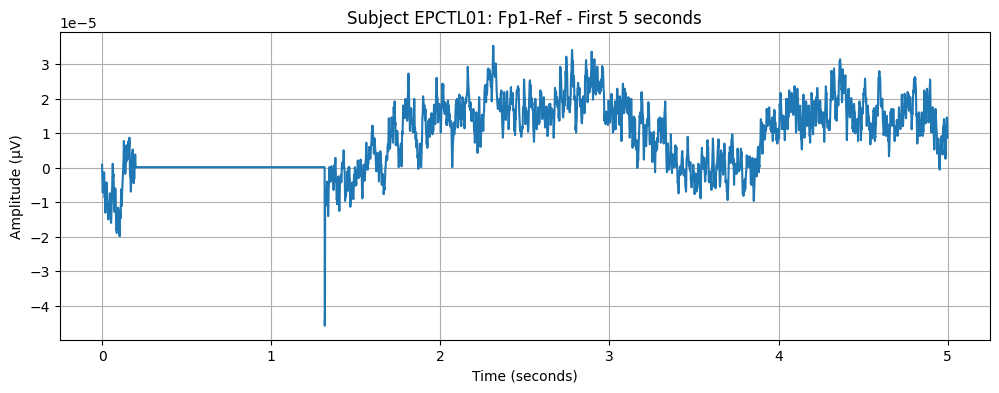

In [14]:
def plot_single_channel(edf_file, subject_id='EPCTL01', channel='Fp1-Ref', duration=5):
    """
    Plot 5 seconds of data from a single channel
    
    Args:
        subject_id (str): Subject ID (e.g., 'EPCTL01')
        channel (str): Channel name to plot (e.g., 'Fp1-Ref')
        duration (int): Duration in seconds to plot
    """
    # Construct the file path based on your directory structure
    
    try:
        # Read only the first few seconds of data to avoid memory issues
        raw = mne.io.read_raw_edf(edf_file, preload=True)
        
        # Select only one channel
        raw.pick_channels([channel])
        
        # Get a small segment of data
        start_time = 0  # start from the beginning
        data, times = raw[:, raw.time_as_index(start_time)[0]:raw.time_as_index(start_time + duration)[0]]
        
        # Create the plot
        plt.figure(figsize=(12, 4))
        plt.plot(times, data.T)
        plt.title(f'Subject {subject_id}: {channel} - First {duration} seconds')
        plt.xlabel('Time (seconds)')
        plt.ylabel('Amplitude (µV)')
        plt.grid(True)
        plt.show()
        
    except Exception as e:
        print(f"Error: {e}")
        print("Please check if the file path is correct:", edf_file)

plot_single_channel(paths['edf'], subject_id='EPCTL01', channel='Fp1-Ref', duration=30)